<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


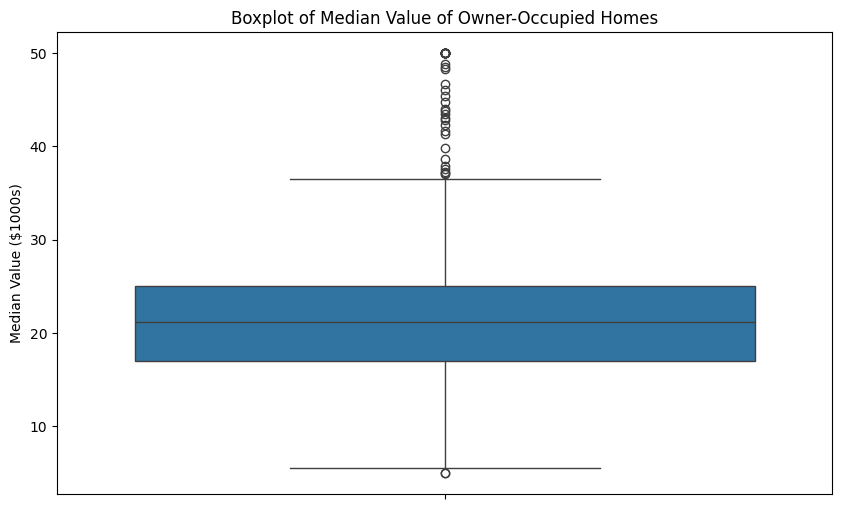

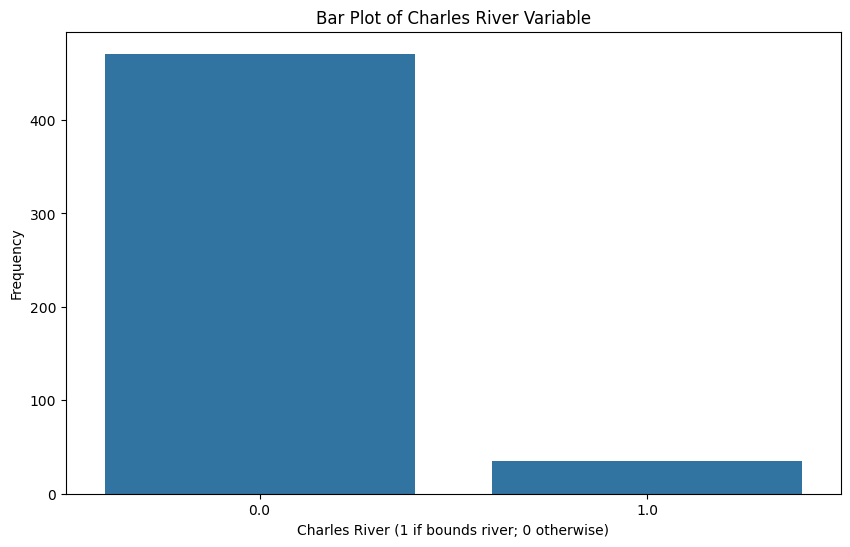

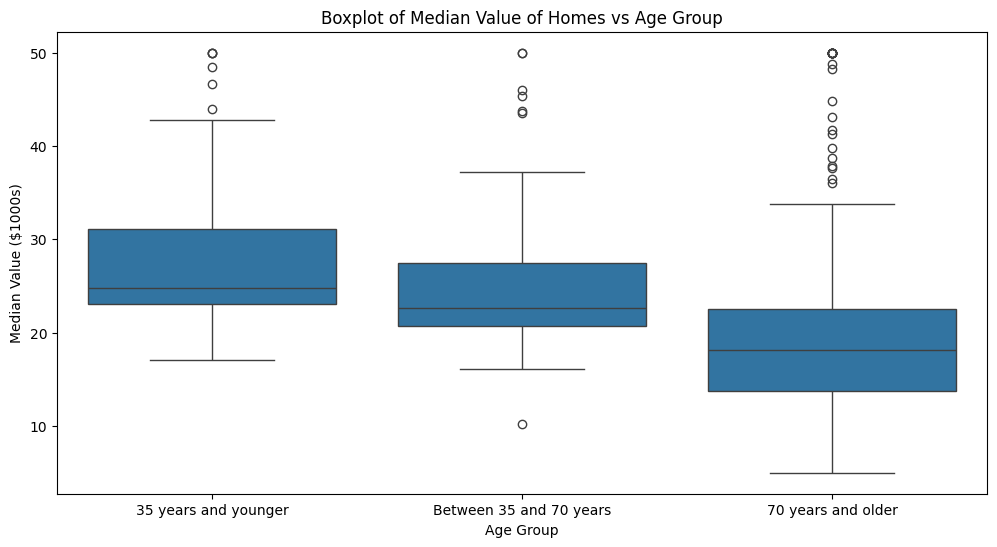

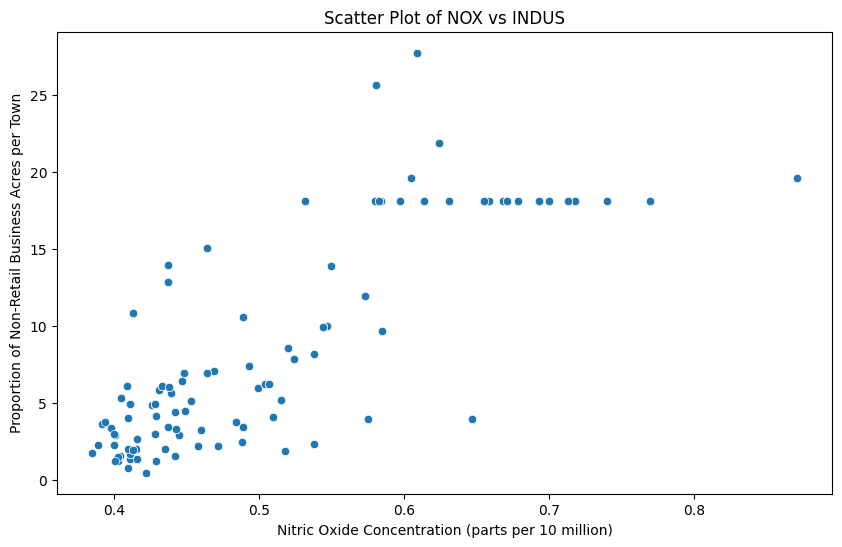

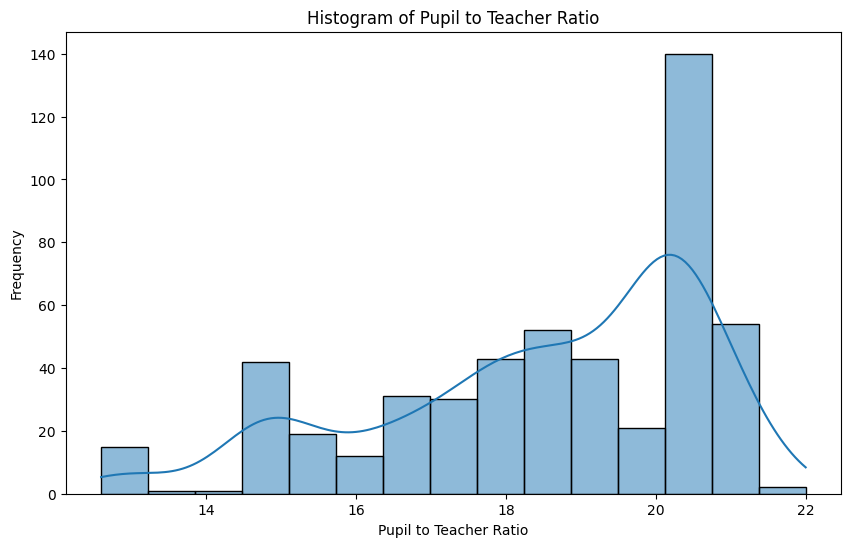

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(boston_url)

# Task 2: Generate Descriptive Statistics and Visualizations

# 1. Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 2. Bar plot for the Charles river variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 if bounds river; 0 otherwise)')
plt.ylabel('Frequency')
plt.show()

# 3. Boxplot for MEDV variable vs AGE variable (discretized)
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Boxplot of Median Value of Homes vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 4. Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['NOX'], y=df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

# 5. Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics and check for missing values
summary_stats = df.describe()
missing_values = df.isnull().sum()

print(summary_stats)
print(missing_values)


In [8]:
import scipy.stats as stats

# Separate the data into two groups based on the CHAS variable
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River.")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.


In [9]:
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['AGE_Group'] == '35 years and younger']['MEDV'],
    df[df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
    df[df['AGE_Group'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Conclusion
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median values of houses for different proportions of owner-occupied units built before 1940.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median values of houses for different proportions of owner-occupied units built before 1940.")


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in the median values of houses for different proportions of owner-occupied units built before 1940.


In [10]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")


Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [11]:
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = df['DIS']
y = df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Conclusion
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject the null hypothesis: The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        16:50:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0